**Multiple Linear Regression using a Linear Perceptron**

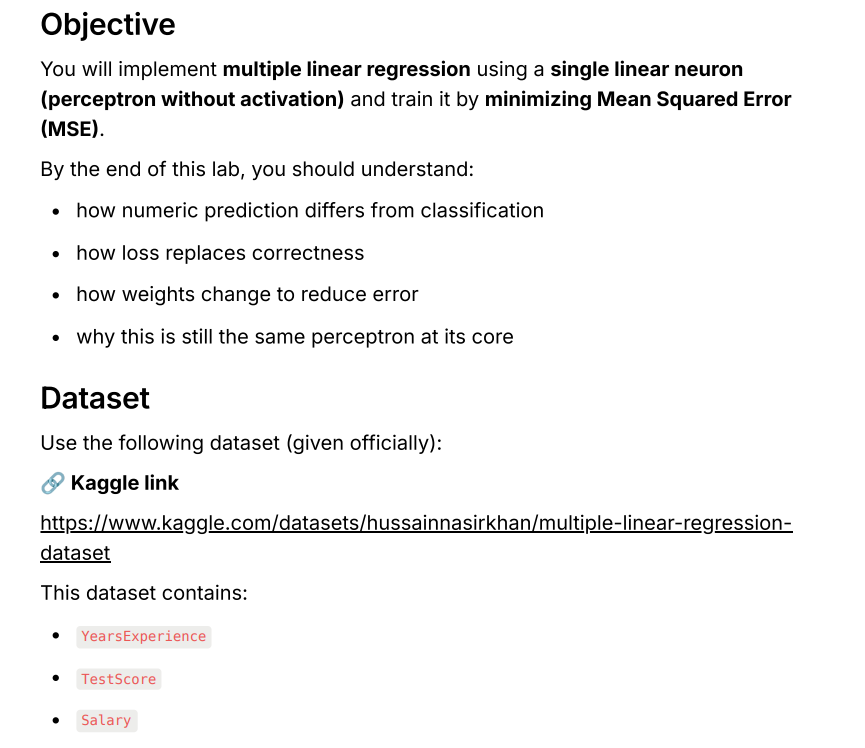

In [1]:
import pandas as pd

# Step1 : Load dataset
data = pd.read_csv("/content/multiple_linear_regression_dataset.csv")

# Inspect data
print(data.head())
print(data.columns)
print(data.shape)

   age  experience  income
0   25           1   30450
1   30           3   35670
2   47           2   31580
3   32           5   40130
4   43          10   47830
Index(['age', 'experience', 'income'], dtype='object')
(20, 3)


**Explanation**

**What this step does:**
Loads the dataset and displays its structure.

**Why it is needed:**
We must understand the number of features and the target before building the model.

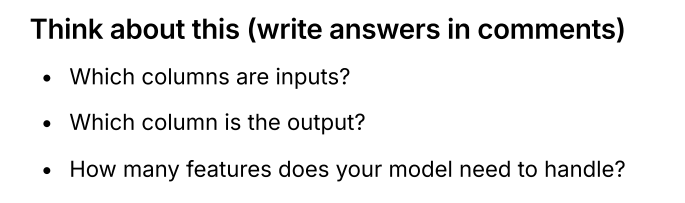

In [ ]:
# Inputs: age , experience
# Output: income
# Number of features: 2

In [3]:
#Step 2: Separate Inputs and Output
# Inputs (features)
X = data[["age", "experience"]].values

# Output (target)
y = data["income"].values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (20, 2)
Shape of y: (20,)


In [ ]:
# X has 2 columns because there are two input features.
# y has one column because salary is a single output value.

**Explanation**

**What this step does:**
Separates input features from the output target.

**Why it is needed:**
The model learns a mapping from inputs (X) to output (y)

In [4]:
#Step 3: Initialize Model Parameters
import numpy as np

# Number of features
n_features = X.shape[1]

# Initialize weights and bias
w = np.zeros(n_features)
b = 0.0

**Explanation**

**What this step does:**
Creates initial weights and bias for the model.

**Why it is needed:**
Learning begins from these initial values and improves them over time.

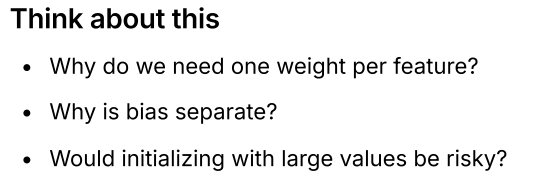

In [ ]:
# One weight per feature because each input contributes differently.
# Bias shifts the prediction independent of input values.
# Large initial values may cause unstable learning.

In [5]:
#Step 4: Define the Forward Pass
def predict(X, w, b):
    """
    X : input features
    w : weights
    b : bias
    returns predicted values
    """
    y_hat = X.dot(w) + b
    return y_hat

**Explanation**

**What this step does:**
Computes predicted salary values.

**Why it is needed:**
The model must produce predictions before evaluating errors.

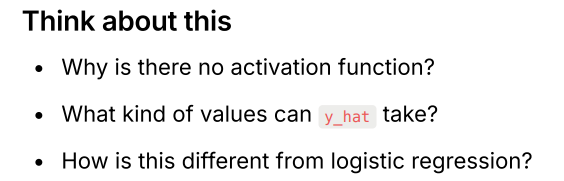

In [ ]:
# No activation function because this is regression.
# y_hat can take any real value.
# Logistic regression outputs probabilities, but this outputs numeric values.

In [6]:
#Step 5: Loss Function (MSE)
def mean_squared_error(y, y_hat):
    """
    y : actual values
    y_hat : predicted values
    """
    loss = ((y_hat - y) ** 2).mean()
    return loss

**Explanation**

**What this step does:**
Measures how far predictions are from actual values.

**Why it is needed:**
The model uses this loss to know how to improve.

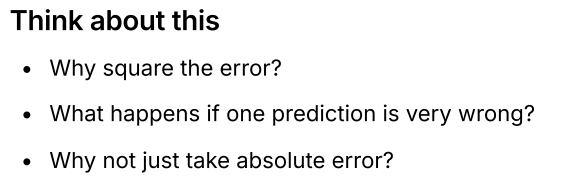

In [ ]:
# Squaring the error penalizes larger mistakes more.
# A very wrong prediction increases loss significantly.
# Absolute error is less sensitive to large mistakes.

In [7]:
#Step 6: Compute Gradients
def compute_gradients(X, y, y_hat):
    """
    Compute gradients of MSE loss
    """
    N = len(y)

    # Gradient w.r.t weights
    dw = (2 / N) * X.T.dot(y_hat - y)

    # Gradient w.r.t bias
    db = (2 / N) * (y_hat - y).sum()

    return dw, db

**Explanation**

**What this step does:**
Computes how weights and bias should change.

**Why it is needed:**
Gradients guide the direction of learning.

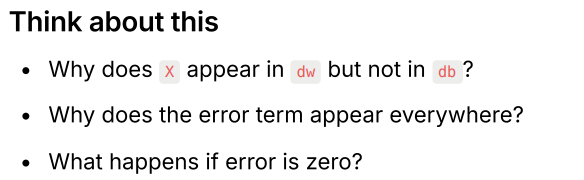

In [ ]:
# X appears in dw because weights are tied to input features.
# Bias is independent of input values.
# Error appears because gradients depend on prediction mistakes.
# If error is zero, gradients become zero and learning stops.

In [8]:
#Step 7: Update Parameters
def update_parameters(w, b, dw, db, lr):
    w = w - lr * dw
    b = b - lr * db
    return w, b

**Explanation**

**What this step does:**
Adjusts weights and bias using gradients.

**Why it is needed:**
Without updates, the model would never learn.

In [9]:
#Step 8: Training Loop
lr = 0.0001
epochs = 1000

for epoch in range(epochs):
    y_hat = predict(X, w, b)
    loss = mean_squared_error(y, y_hat)
    dw, db = compute_gradients(X, y, y_hat)
    w, b = update_parameters(w, b, dw, db, lr)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.2f}")

Epoch 0, Loss: 1727049635.00
Epoch 100, Loss: 66491868.55
Epoch 200, Loss: 61752567.20
Epoch 300, Loss: 58616531.08
Epoch 400, Loss: 56528801.54
Epoch 500, Loss: 55126542.03
Epoch 600, Loss: 54172526.95
Epoch 700, Loss: 53511656.14
Epoch 800, Loss: 53042523.73
Epoch 900, Loss: 52698829.56


**Explanation**

**What this step does:**
Trains the model over multiple iterations.

**Why it is needed:**
Learning is gradual and requires repeated updates.

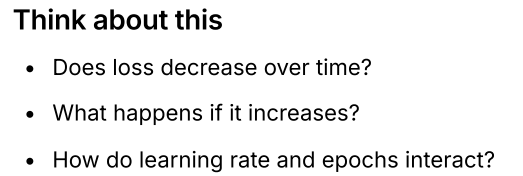

In [ ]:
# Loss should decrease over time.
# If it increases, learning rate may be too high.
# More epochs allow more learning; learning rate controls step size.

In [10]:
#Step 9: Final Evaluation
print("Final weights:", w)
print("Final bias:", b)

# Predict for a new candidate
new_candidate = np.array([4.5, 68])
predicted_salary = new_candidate.dot(w) + b

print("Predicted salary:", predicted_salary)

Final weights: [ 764.75405919 1371.03430441]
Final bias: 321.73641174472493
Predicted salary: 96993.4623777421


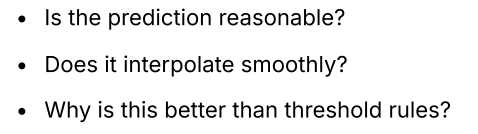

In [ ]:
# Prediction should be within the general salary range.
# The model interpolates smoothly between known data points.
# This is better than threshold rules because it gives continuous outputs.